In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import shap


In [3]:
# Download from Kaggle or use a local path
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(data.info())
print(data.isnull().sum())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


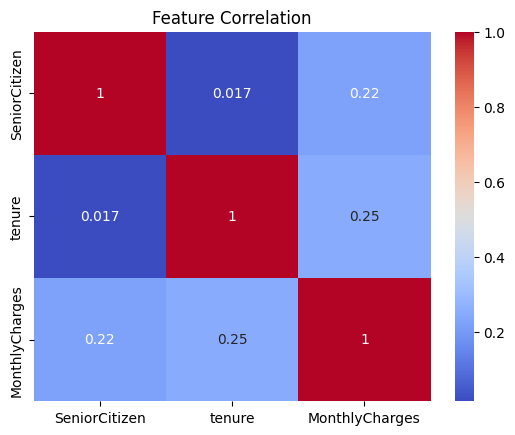

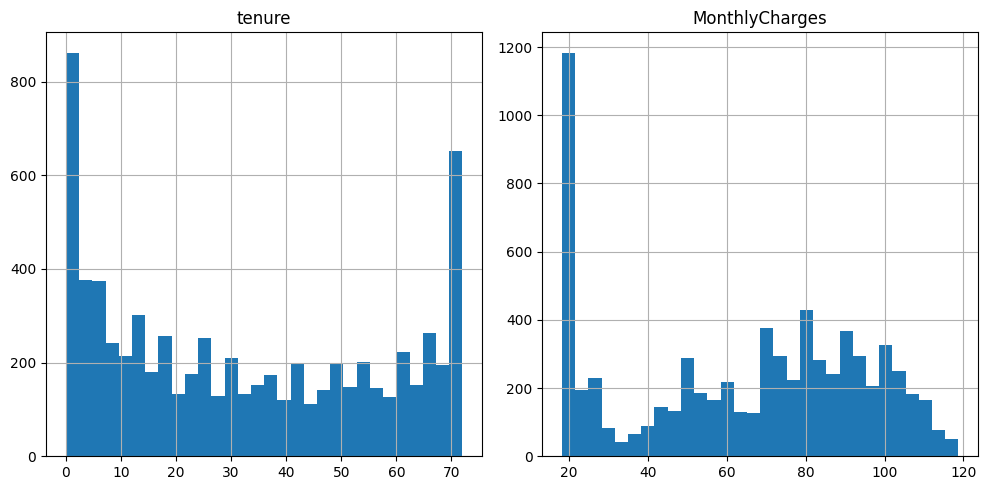

In [5]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Distribution of numerical features
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[num_cols].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


<ipython-input-6-b698680ce3b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [7]:
# Drop customerID
data.drop('customerID', axis=1, inplace=True)

# Convert 'Churn' to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)


In [8]:
scaler = StandardScaler()
scaled_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])


In [9]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Logistic Regression
lr = GridSearchCV(LogisticRegression(), {'C': [0.1, 1, 10]}, cv=5)
lr.fit(X_train, y_train)

# Random Forest
rf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}, cv=5)
rf.fit(X_train, y_train)

# SVM
svm = GridSearchCV(SVC(probability=True), {
    'C': [0.1, 1],
    'kernel': ['rbf', 'linear']
}, cv=5)
svm.fit(X_train, y_train)

# XGBoost
xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6]
}, cv=5)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]})

---Logistic Regression---
Accuracy: 0.8211497515968772
Precision: 0.6861538461538461
Recall: 0.5978552278820375
F1 Score: 0.6389684813753582


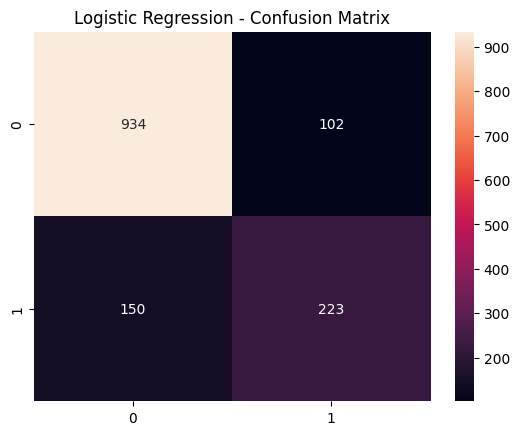

---Random Forest---
Accuracy: 0.808374733853797
Precision: 0.6872727272727273
Recall: 0.5067024128686327
F1 Score: 0.5833333333333334


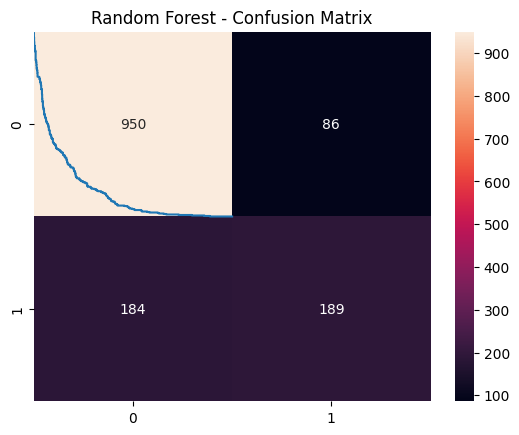

---SVM---
Accuracy: 0.8140525195173882
Precision: 0.7003610108303249
Recall: 0.5201072386058981
F1 Score: 0.5969230769230769


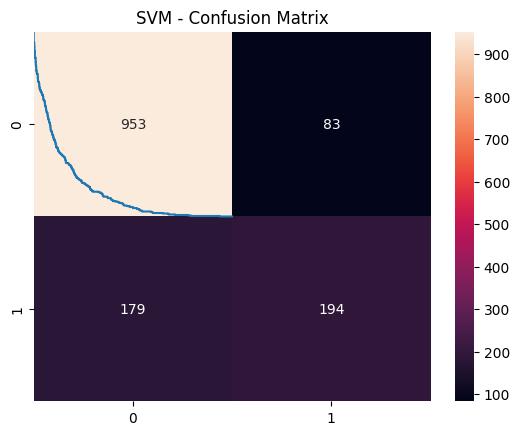

---XGBoost---
Accuracy: 0.8105039034776437
Precision: 0.6778523489932886
Recall: 0.5415549597855228
F1 Score: 0.6020864381520119


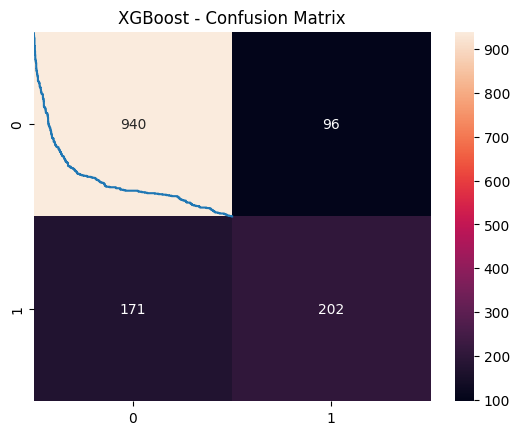

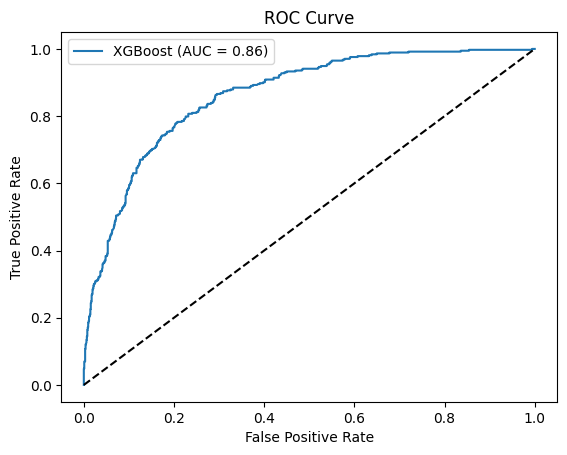

In [11]:
models = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm, 'XGBoost': xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"---{name}---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


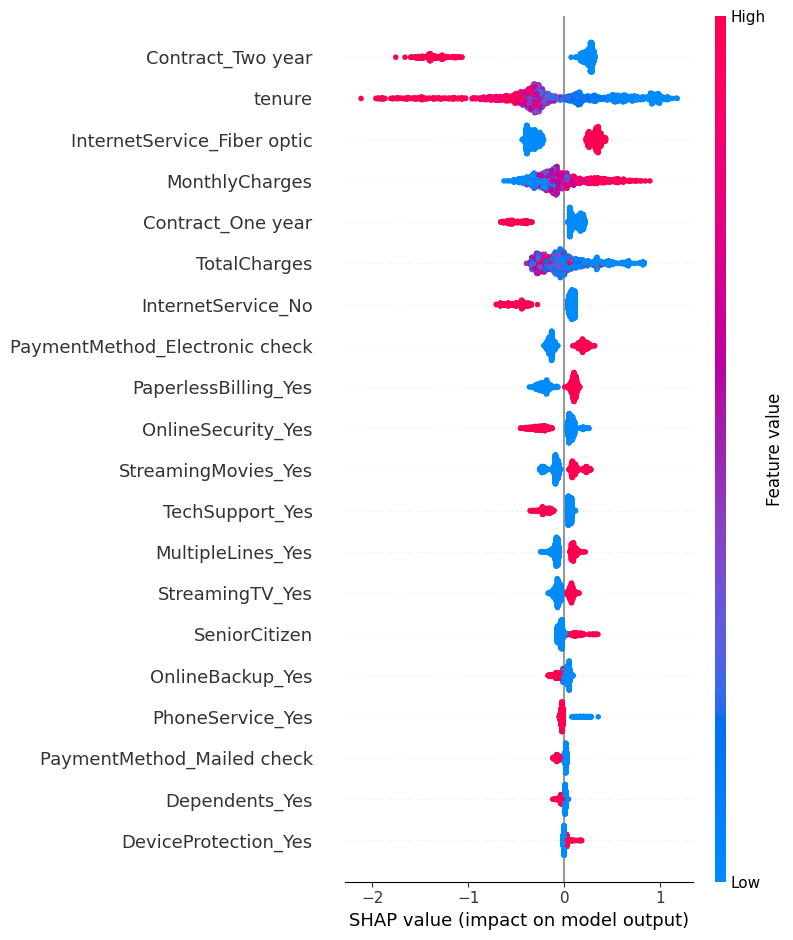

In [12]:
explainer = shap.Explainer(xgb.best_estimator_)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)


In [13]:
# Create new features
X['MonthlyTenure'] = X['MonthlyCharges'] * X['tenure']
X['ChargeRatio'] = X['MonthlyCharges'] / (X['TotalCharges'] + 1e-6)


In [14]:
# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale new numerical columns
scaler = StandardScaler()
X_train[['MonthlyTenure', 'ChargeRatio']] = scaler.fit_transform(X_train[['MonthlyTenure', 'ChargeRatio']])
X_test[['MonthlyTenure', 'ChargeRatio']] = scaler.transform(X_test[['MonthlyTenure', 'ChargeRatio']])


In [15]:
pip install imbalanced-learn


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_balanced))


Before SMOTE: [4138 1496]
After SMOTE: [4138 4138]


In [17]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

grid = GridSearchCV(xgb_model, params, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid.fit(X_train_balanced, y_train_balanced)

best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print("Improved F1 Score:", f1_score(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:54:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Improved Accuracy: 0.7735982966643009
Improved F1 Score: 0.6027397260273972


In [18]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=1)),
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

ensemble.fit(X_train_balanced, y_train_balanced)
y_pred_ens = ensemble.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ens))
print("Ensemble F1 Score:", f1_score(y_test, y_pred_ens))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Accuracy: 0.7885024840312278
Ensemble F1 Score: 0.6374695863746959


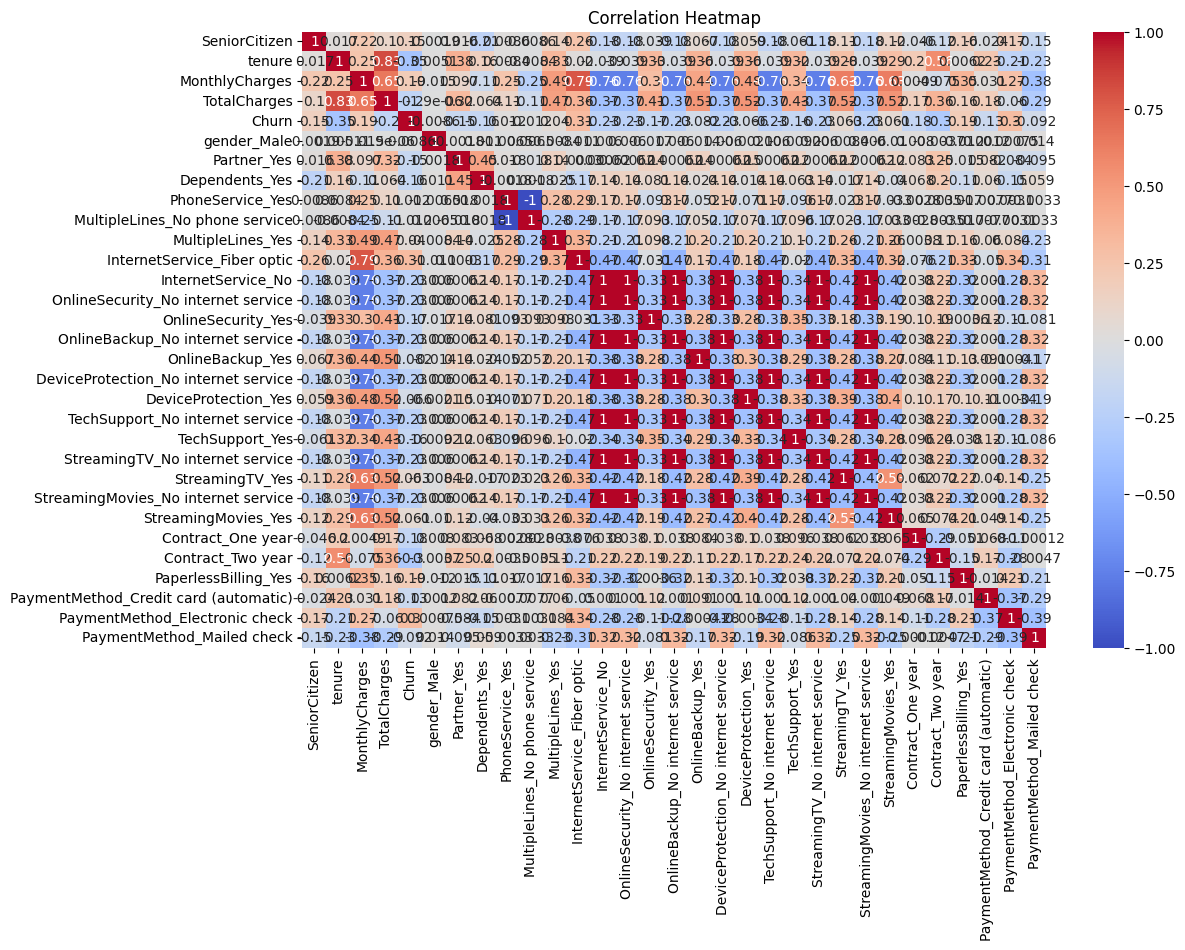

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


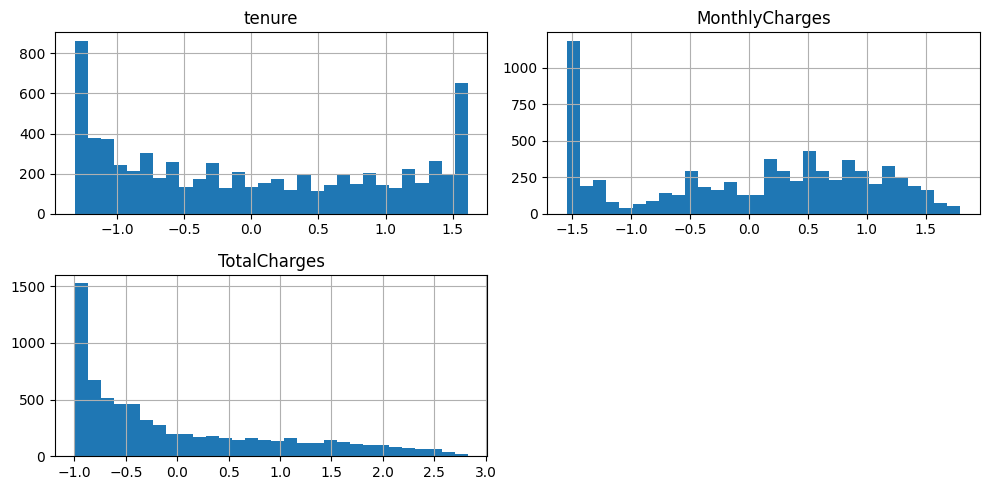

In [20]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


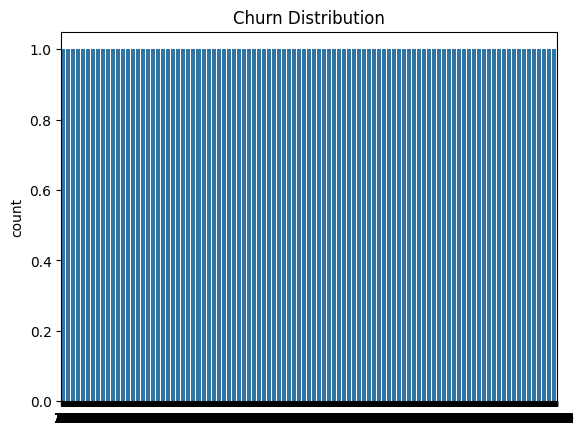

In [21]:
sns.countplot(data['Churn'])
plt.title("Churn Distribution")
plt.show()


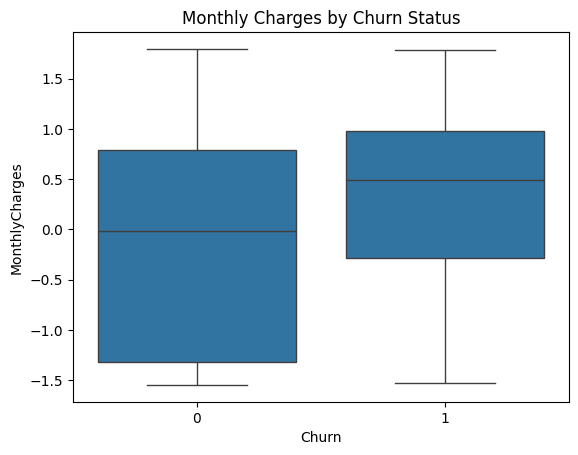

In [22]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn Status")
plt.show()


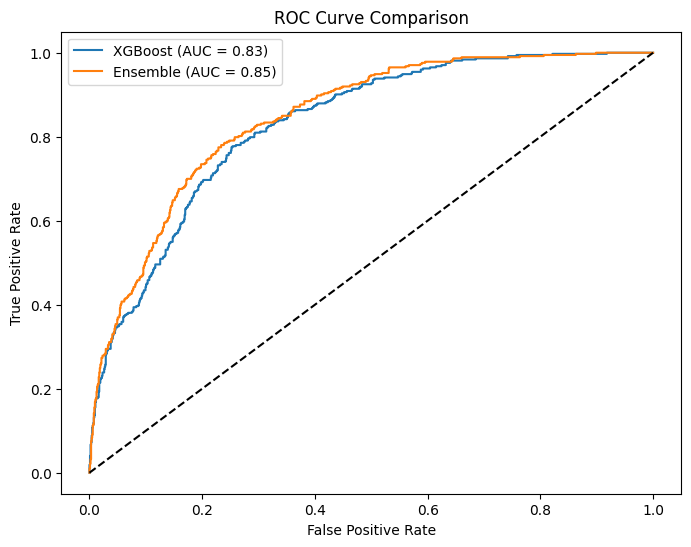

In [23]:
def plot_roc(model, model_name):
    y_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.figure(figsize=(8,6))
plot_roc(best_xgb, "XGBoost")
plot_roc(ensemble, "Ensemble")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


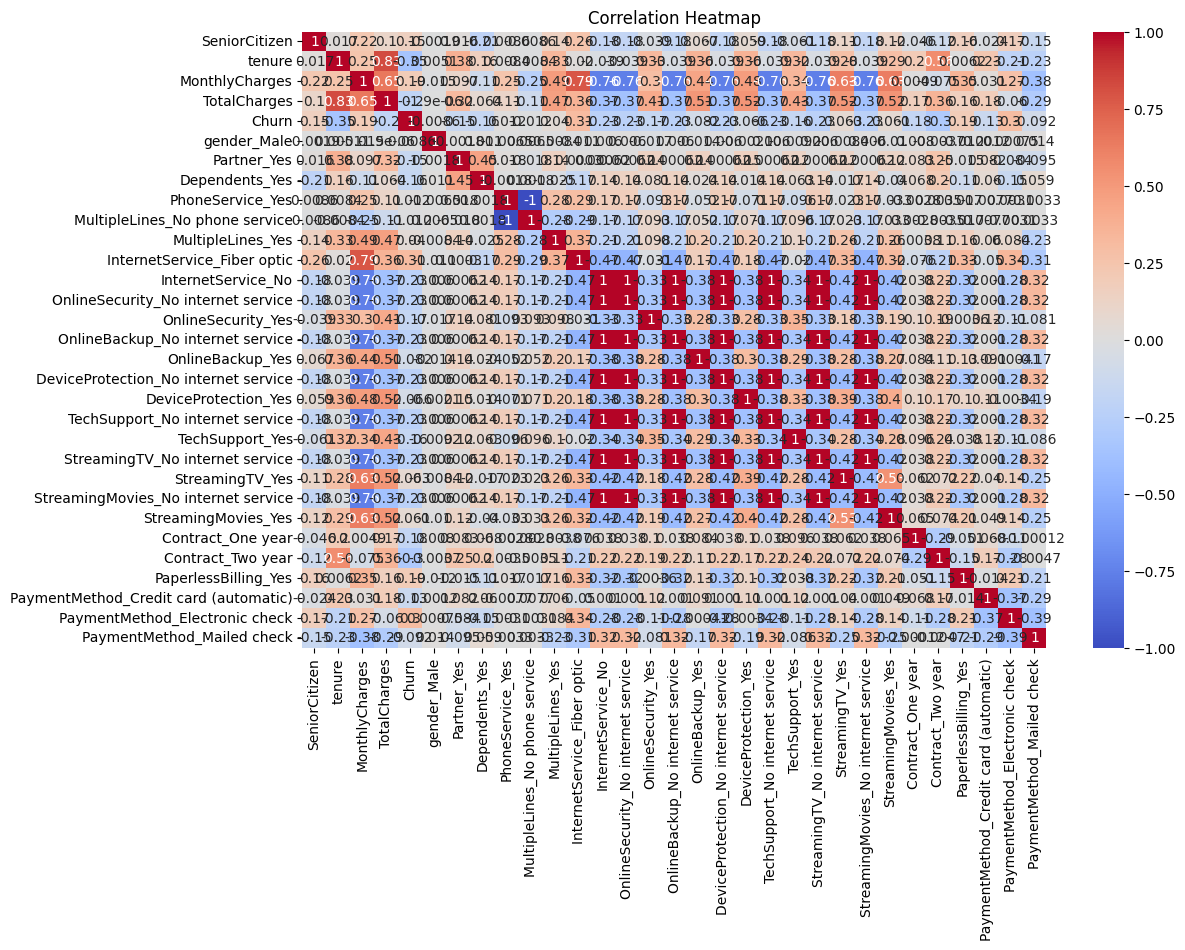

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


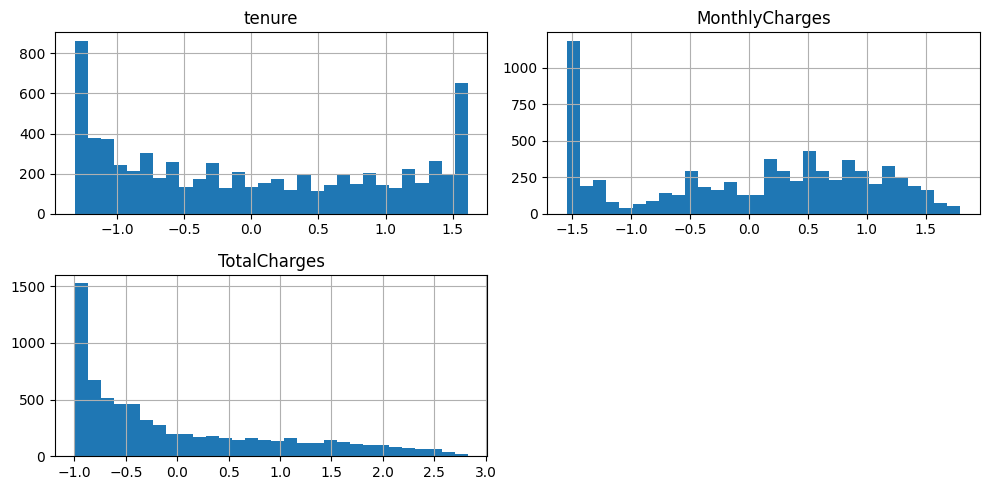

In [25]:
data[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.savefig("feature_distributions.png", dpi=300, bbox_inches='tight')
plt.show()


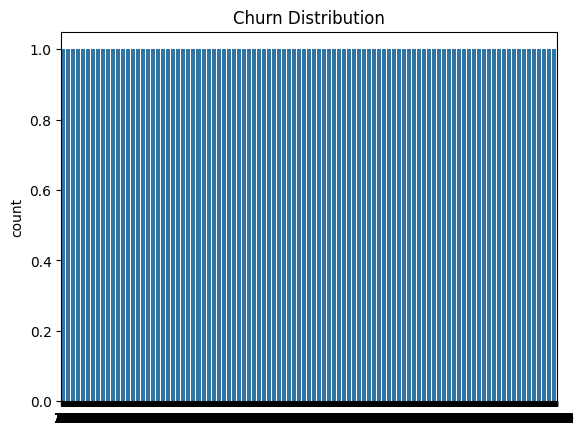

In [26]:
sns.countplot(data['Churn'])
plt.title("Churn Distribution")
plt.savefig("churn_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


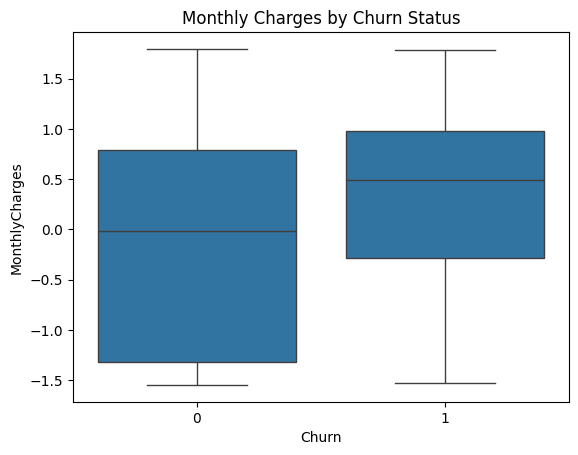

In [27]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn Status")
plt.savefig("monthly_charges_by_churn.png", dpi=300, bbox_inches='tight')
plt.show()


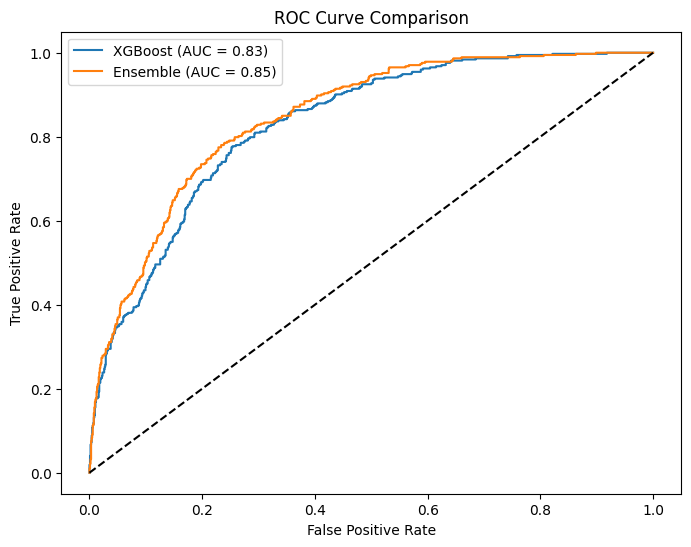

In [28]:
plt.figure(figsize=(8,6))
plot_roc(best_xgb, "XGBoost")
plot_roc(ensemble, "Ensemble")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.savefig("roc_curve_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
